In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

In [2]:
#model scoring using mean absolute error
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [3]:
raw_df = pd.read_csv('./train_dataset.csv',)

In [4]:
raw_df.head()

,Start Time,Finish Time,Activity,Seq Code,Recipe Name,Break Reasons,Missing Ingredients,Kitting Line,Assembly Batch,Event Shift,Team Leader,Pickers Count,Time Consumption,Week
0,1/1/2019 0:00,5/6/2020 8:15,Factory Closed,NaN,D4,NaN,NaN,NaN,NaN,Wednesday Morning,iXUsr_Davidson(8254),2,495.50,2020-20
1,5/6/2020 8:15,5/6/2020 8:15,Preparation/Changeover,NaN,D4,NaN,NaN,KL1,NaN,Wednesday Morning,iXUsr_Davidson(8254),2,0.15,2020-20
2,5/6/2020 8:15,5/6/2020 8:31,Production,NaN,D4,NaN,NaN,KL1,NaN,Wednesday Morning,iXUsr_Davidson(8254),2,15.72,2020-20
3,5/6/2020 8:31,5/6/2020 8:36,Break,NaN,D4,machine down,NaN,KL1,NaN,Wednesday Morning,iXUsr_Davidson(8254),2,5.48,2020-20
4,5/6/2020 8:36,5/6/2020 8:42,Production,0001 of 0033,D4,NaN,NaN,KL1,Friday Assembly,Wednesday Morning,iXUsr_Davidson(8254),2,6.00,2020-20


In [5]:
raw_df.describe()

,Pickers Count,Time Consumption
count,7882.000000,7882.000000
mean,3.016493,19.324768
std,0.669439,94.389956
min,0.000000,0.070000
25%,3.000000,2.820000
50%,3.000000,4.150000
75%,3.000000,5.650000
max,4.000000,1239.270000


In [6]:
df_C2 = raw_df[(raw_df['Recipe Name'] == 'C2') & (raw_df['Seq Code'].notnull()) & (raw_df['Time Consumption'] > 1) & (raw_df['Time Consumption'] < 10)]
df_C2.head()

,Start Time,Finish Time,Activity,Seq Code,Recipe Name,Break Reasons,Missing Ingredients,Kitting Line,Assembly Batch,Event Shift,Team Leader,Pickers Count,Time Consumption,Week
6222,5/6/2020 16:01,5/6/2020 16:06,Production,0002 of 0141,C2,NaN,NaN,KL17,Friday Assembly,Wednesday Afternoon,JAMES RAY ALAY-AY;,3,4.80,2020-20
6223,5/6/2020 16:06,5/6/2020 16:08,Production,0003 of 0141,C2,NaN,NaN,KL17,Friday Assembly,Wednesday Afternoon,JAMES RAY ALAY-AY;,3,2.20,2020-20
6224,5/6/2020 16:08,5/6/2020 16:11,Production,0004 of 0141,C2,NaN,NaN,KL17,Friday Assembly,Wednesday Afternoon,JAMES RAY ALAY-AY;,3,3.12,2020-20
6225,5/6/2020 16:11,5/6/2020 16:14,Production,0005 of 0141,C2,NaN,NaN,KL17,Friday Assembly,Wednesday Afternoon,JAMES RAY ALAY-AY;,3,2.73,2020-20
6226,5/6/2020 16:14,5/6/2020 16:17,Production,0006 of 0141,C2,NaN,NaN,KL17,Friday Assembly,Wednesday Afternoon,JAMES RAY ALAY-AY;,3,3.15,2020-20


In [7]:
df_C2.describe()

,Pickers Count,Time Consumption
count,538.0,538.000000
mean,3.0,3.758848
std,0.0,1.116556
min,3.0,1.030000
25%,3.0,3.080000
50%,3.0,3.525000
75%,3.0,4.250000
max,3.0,9.620000


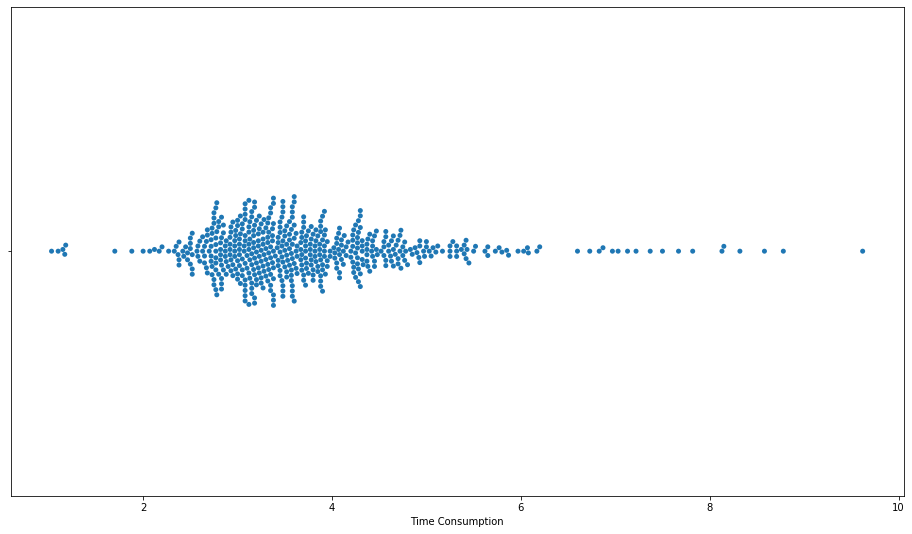

In [8]:

plt.figure(figsize = (16,9))

sns.swarmplot(x=df_C2['Time Consumption'], hue = df_C2['Pickers Count'])


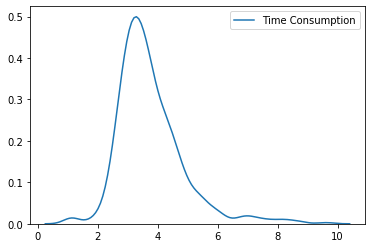

In [9]:
sns.kdeplot(data = df_C2['Time Consumption'])

In [10]:
recipes = list(raw_df['Recipe Name'].unique())
len(recipes)

29

In [15]:
def plot_all_recipes(recipes):
    for recipe in recipes:
        temp_df = raw_df[(raw_df['Recipe Name'] == recipe) & (raw_df['Seq Code'].notnull()) & (raw_df['Time Consumption'] > 1) & (raw_df['Time Consumption'] < 10)]
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,3))
        fig.suptitle(recipe, fontsize=16)
        sns.swarmplot(x=temp_df['Time Consumption'], hue = temp_df['Pickers Count'], ax = axes[0])
        sns.kdeplot(data = temp_df['Time Consumption'], ax = axes[1])
        plt.show()


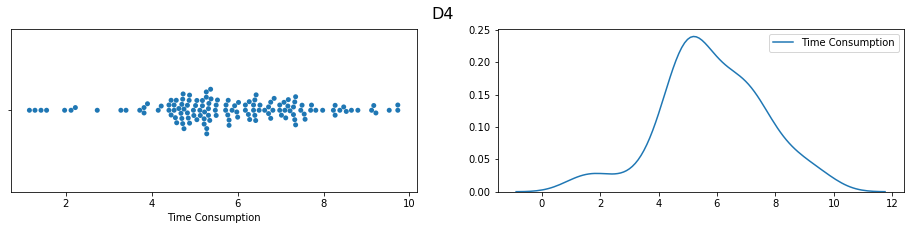

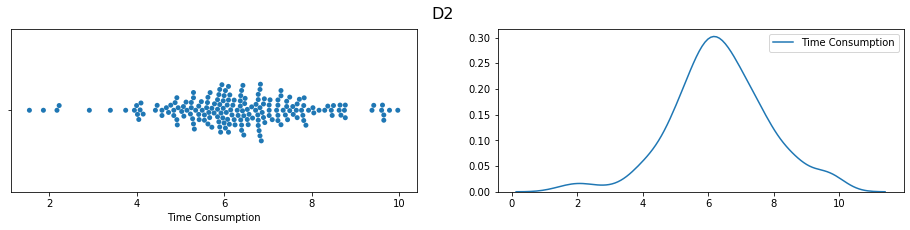

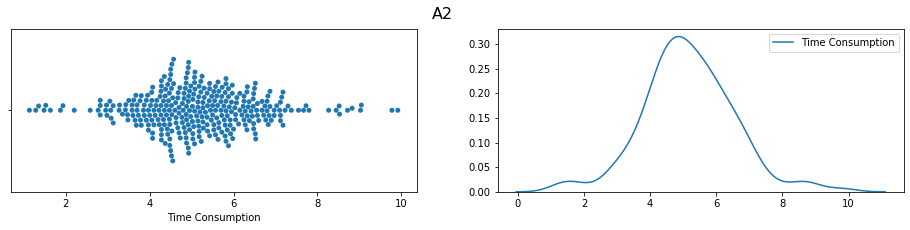

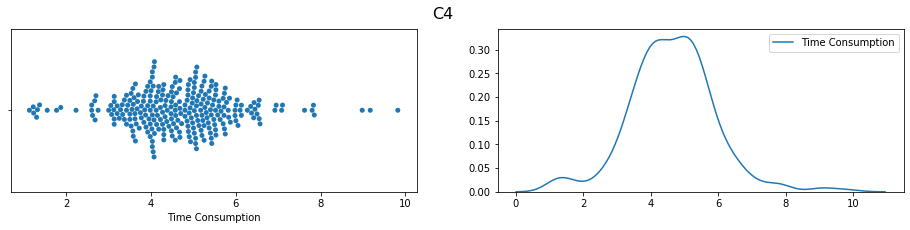

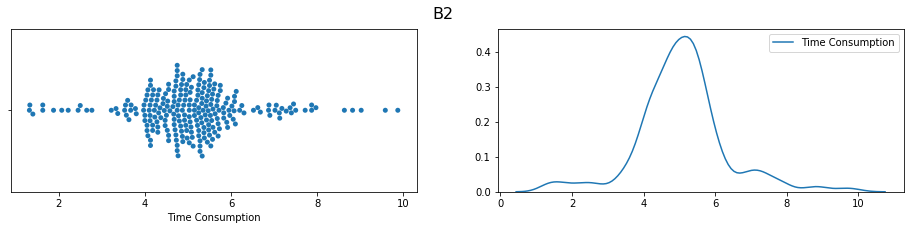

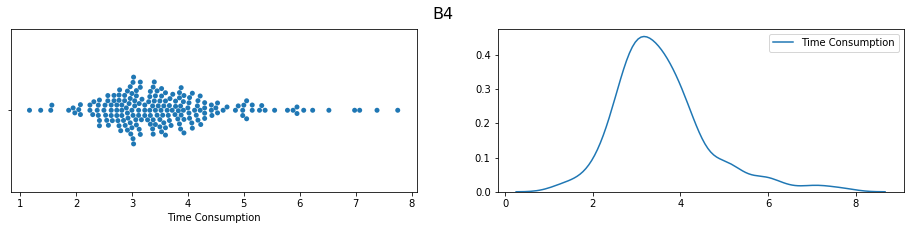

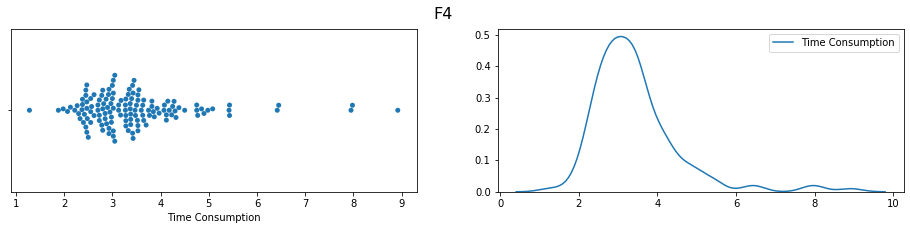

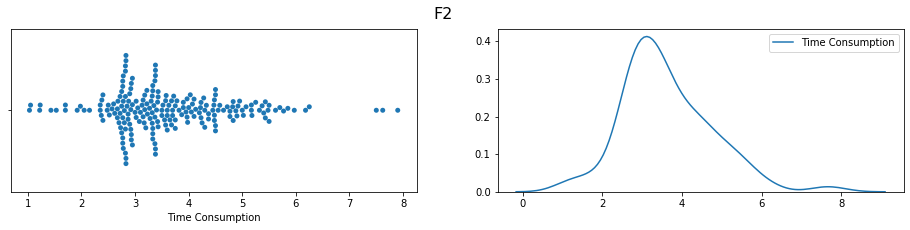

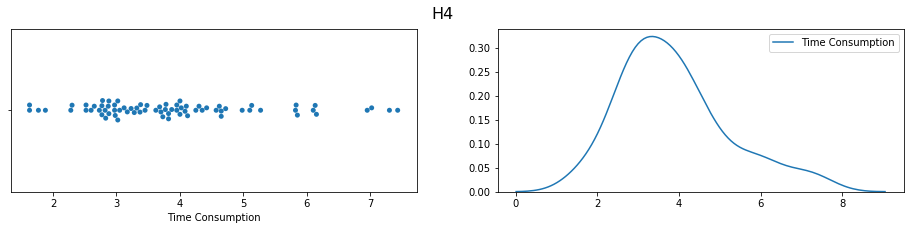

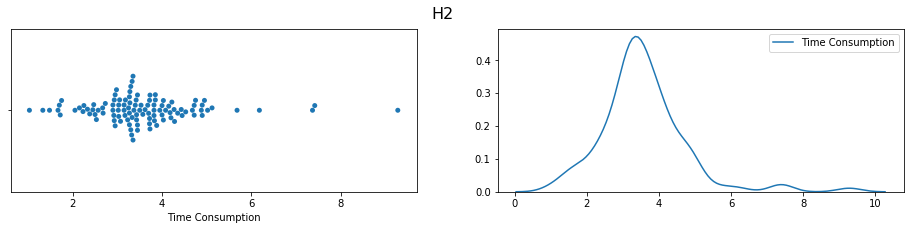

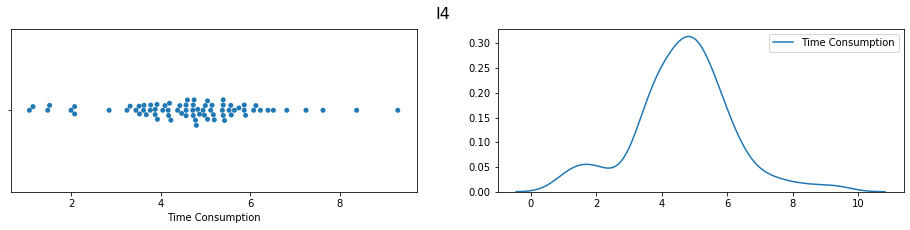

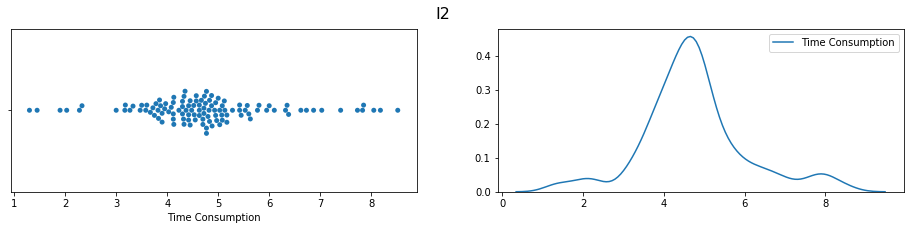

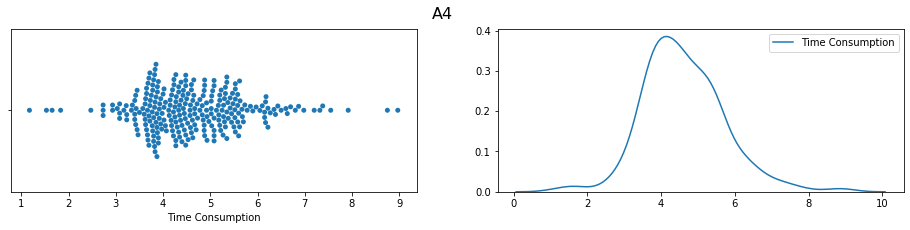

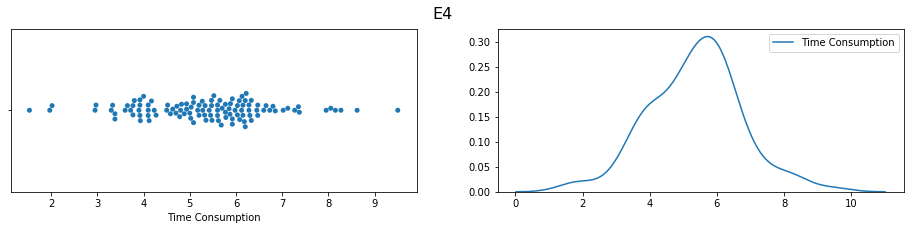

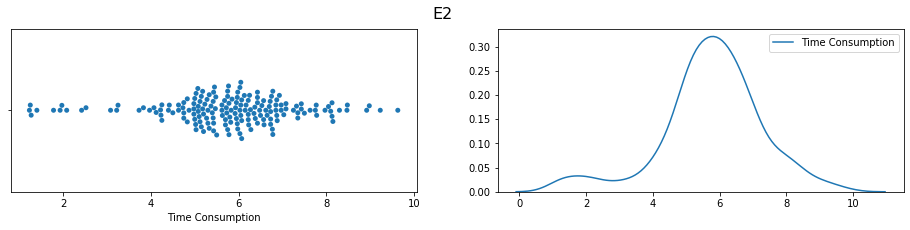

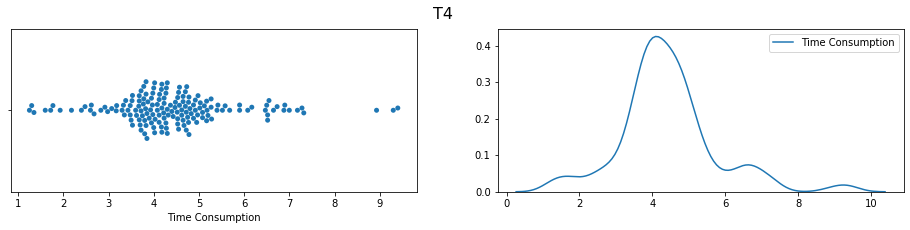

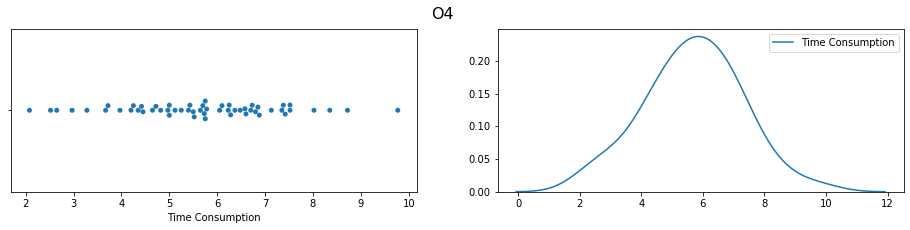

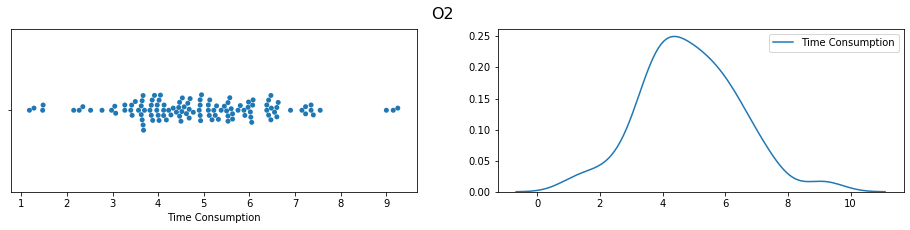

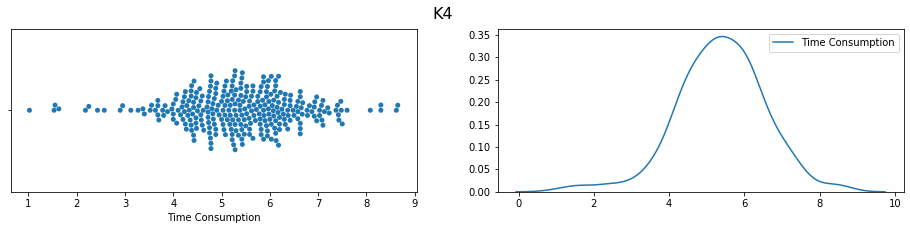

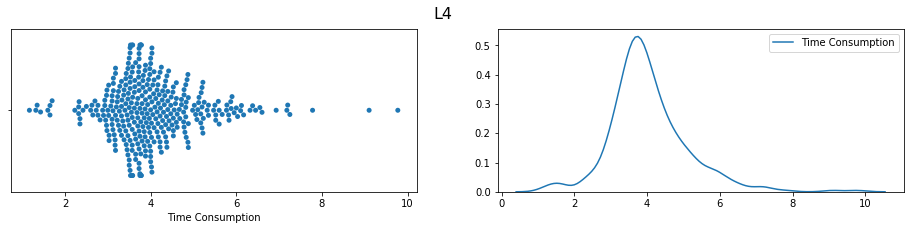

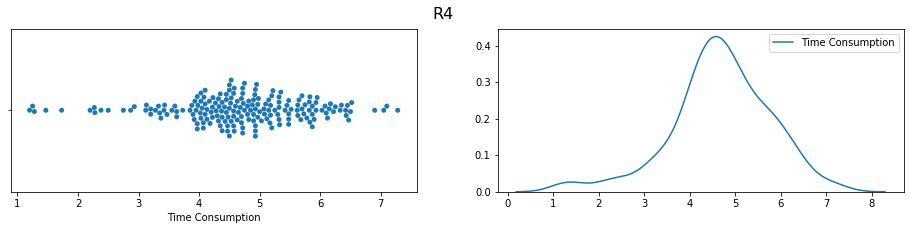

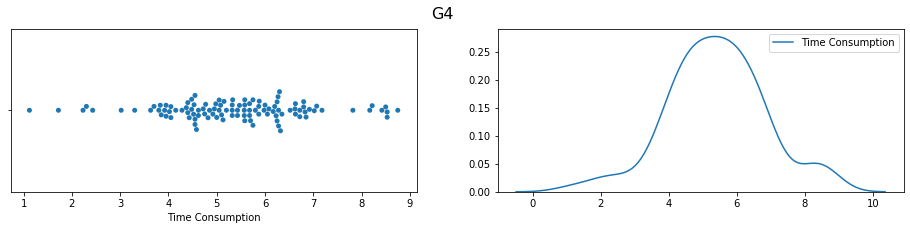

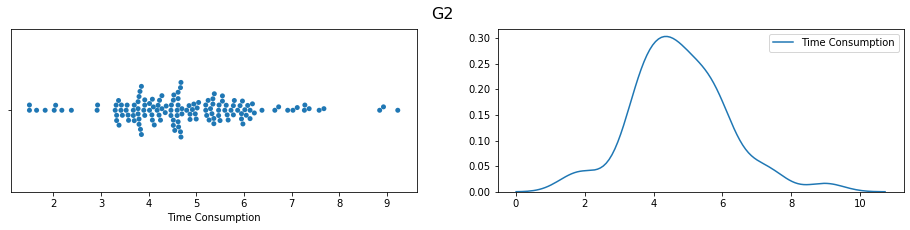

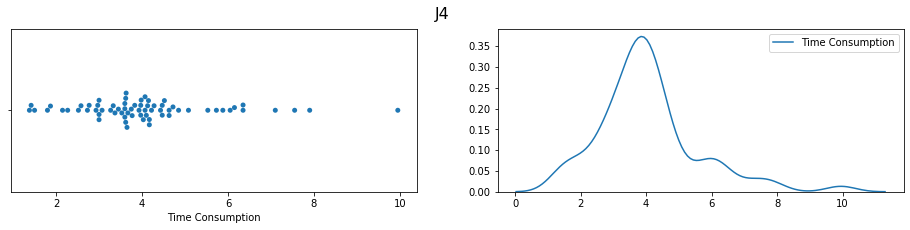

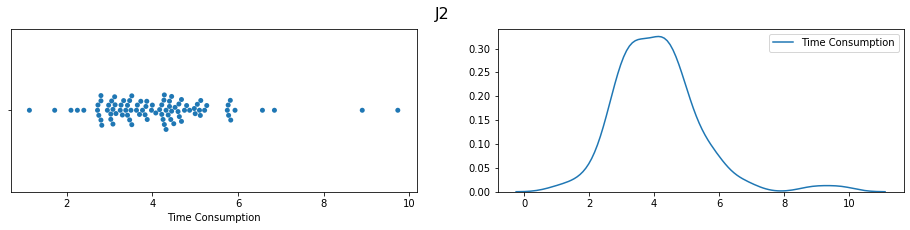

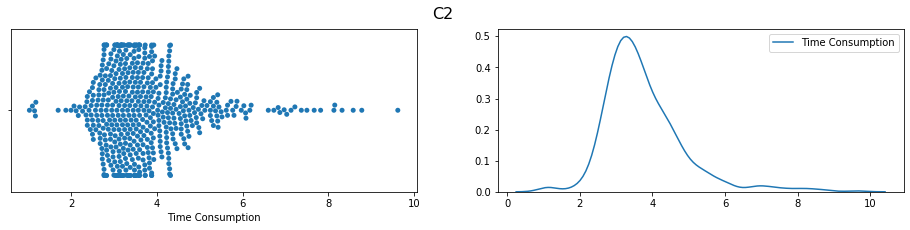

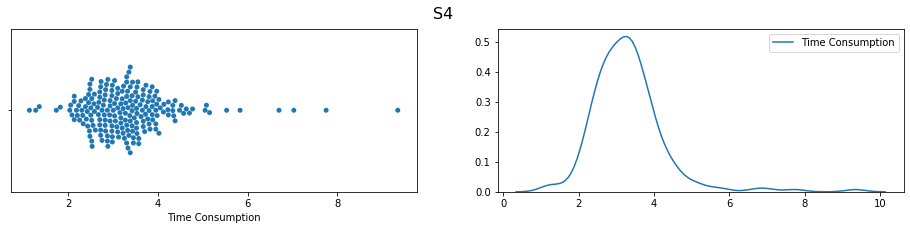

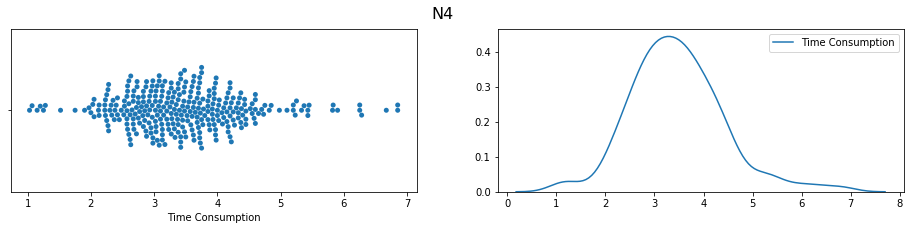

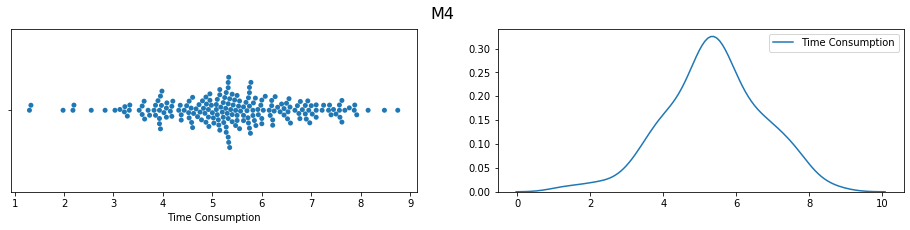

In [16]:
plot_all_recipes(recipes)